In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


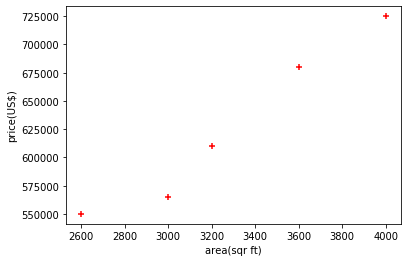

In [5]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df['area'],df['price'], color='red', marker='+')

In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
reg.predict([[3300]])

array([628715.75342466])

In [8]:
reg.coef_

array([135.78767123])

In [9]:
reg.intercept_

180616.43835616432

In [10]:
areas = pd.read_csv("areas.csv")
areas.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [11]:
p = reg.predict(areas)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [12]:
areas['prices'] = p
areas

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [13]:
areas.to_csv("prediction.csv", index=False)

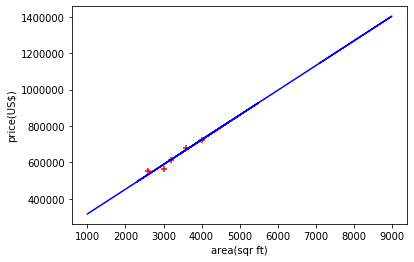

In [14]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df['area'],df['price'], color='red', marker='+')
plt.plot(areas.area,reg.predict(areas[["area"]]),color='blue')

In [15]:
import pickle

In [17]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg,f)

In [18]:
with open('model_pickle', 'rb') as f:
    model = pickle.load(f)

In [19]:
model.predict([[5000]])

array([859554.79452055])

In [20]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [21]:
joblib.dump(model, 'model_joblib')

['model_joblib']

In [22]:
mj = joblib.load('model_joblib')

In [23]:
mj.predict([[5000]])

array([859554.79452055])